In [16]:
# Importation of the dataset
import pandas as pd
curve_trx_from_to_path = 'curve_trx_from_to.csv'  
veCRV_20holders_path = 'veCRV_20holders.csv'      
curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)
veCRV_20holders = pd.read_csv(veCRV_20holders_path)


C:\Users\Badr\AppData\Local\Temp\ipykernel_25760\2405887099.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)


In [17]:
# Remove the row where the 'to' variable is missing in curve_trx_from_to dataset
curve_trx_from_to_cleaned = curve_trx_from_to.dropna(subset=['to'])

In [18]:
# Replace missing values in object columns with "Unknown"
object_columns = curve_trx_from_to_cleaned.select_dtypes(include=['object']).columns
curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')


C:\Users\Badr\AppData\Local\Temp\ipykernel_25760\3959577012.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')


In [19]:
curve_trx_from_to_cleaned.columns

Index(['Unnamed: 0', 'blockNumber', 'timeStamp', 'hash', 'nonce', 'blockHash',
       'transactionIndex', 'from', 'to', 'value', 'gas', 'gasPrice', 'isError',
       'txreceipt_status', 'input', 'contractAddress', 'cumulativeGasUsed',
       'gasUsed', 'confirmations', 'methodId', 'functionName'],
      dtype='object')

C:\Users\Badr\AppData\Local\Temp\ipykernel_25760\2218858633.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')


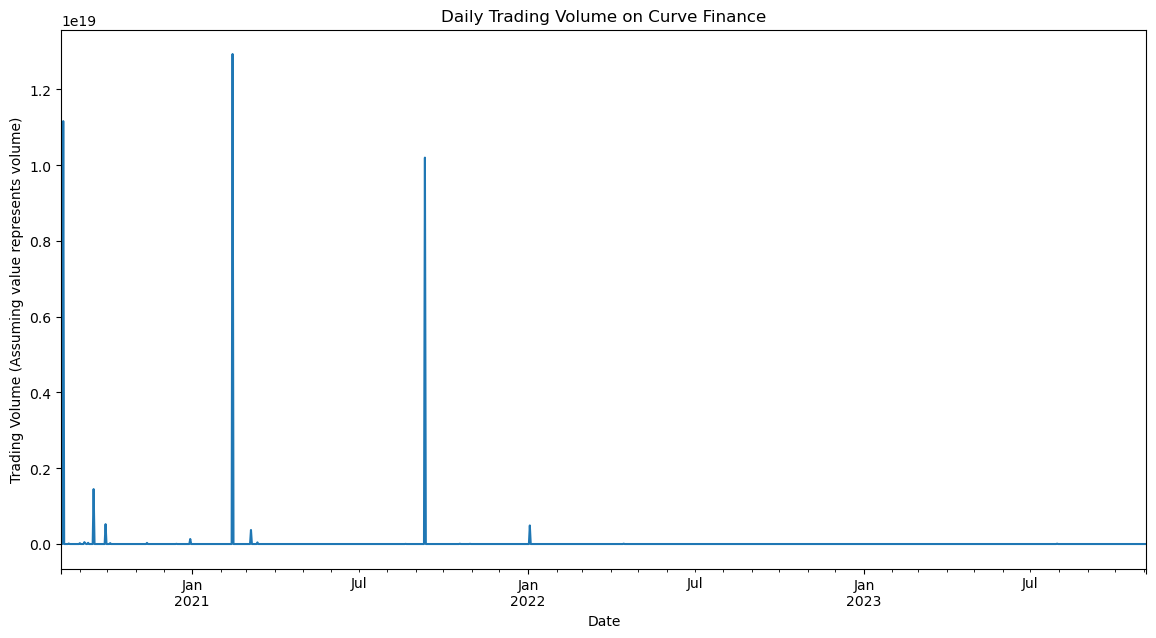

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'curve_trx_from_to' has a column 'value' representing the transaction value
# and 'timeStamp' as the date or datetime of the transaction.
# Ensure that the timeStamp column is converted to datetime format if not already done.

# Convert the timeStamp to datetime if it's not already in that format
curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')

# Then, set the timeStamp as the index of the DataFrame
curve_trx_from_to_cleaned.set_index('timeStamp', inplace=True)

# Now, resample the data to get daily trading volumes (summing up the values)
daily_trading_volume = curve_trx_from_to_cleaned['value'].resample('D').sum()

# Plot the daily trading volume to visualize the historical trend
plt.figure(figsize=(14, 7))
daily_trading_volume.plot(title='Daily Trading Volume on Curve Finance')
plt.ylabel('Trading Volume ')
plt.xlabel('Date')
plt.show()




In [25]:
curve_trx_from_to_cleaned

,Unnamed: 0,blockNumber,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName
timeStamp,,,,,,,,,,,,,,,,,,,,
2020-08-12 22:37:08,1,10647890,0x98578e36a43c16bce03585bb42d4abb25d497b3e593f...,6,0xb516e26b4c39f91c0083ea4e100cd62b32dfe8aae046...,22,0xc4ad0ef33a0a4dda3461c479ccb6c36d1e4b7be4,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,44491,2.800000e+11,0,1,0x1652e9fc000000000000000000000000d061d61a4d94...,Unknown,1797473,44491,7853341,0x1652e9fc,set_minter(address mint_address)
2020-08-13 08:01:55,2,10650423,0x2123091548f65028283a5fe1e9165bf036060130cb92...,29,0x87cb4b5ff3b927fe5c99a9f8757e9b2b5bd00472f245...,48,0xc4ad0ef33a0a4dda3461c479ccb6c36d1e4b7be4,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,28700,3.000000e+11,0,1,0xe9333fab00000000000000000000000040907540d8a6...,Unknown,2812351,28700,7850808,0xe9333fab,set_admin(address newAdmin)
2020-08-13 12:51:11,3,10651699,0xa7bda407889cdd3fa55669ec6301dac224848e0a0c23...,31,0x1af65e181c9d8cf66f20051bf8ccdbec82155b028a09...,124,0xc4ad0ef33a0a4dda3461c479ccb6c36d1e4b7be4,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,45148,2.200000e+11,0,1,0x095ea7b3000000000000000000000000575ccd8e2d30...,Unknown,9173006,45148,7849532,0x095ea7b3,"approve(address _spender, uint256 _value)"
2020-08-13 15:27:30,4,10652420,0x5f762bc8e2929b76cf22936595b2e2a58cbaa9f31ec8...,61,0xee196b990dfff90e9f8ba3e0cddde62ea4a53f1775da...,212,0xc4ad0ef33a0a4dda3461c479ccb6c36d1e4b7be4,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,50873,2.500000e+11,0,1,0xa9059cbb000000000000000000000000f22995a3ea2c...,Unknown,10497109,50873,7848811,0xa9059cbb,"transfer(address _to, uint256 _value)"
2020-08-13 15:28:54,5,10652430,0xb84eb0488e9696e063ce829cfad38aeaced814c54d89...,63,0x5b06d14159a02e8b6358868562dcf061766f7f9c23b0...,17,0xc4ad0ef33a0a4dda3461c479ccb6c36d1e4b7be4,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,50873,2.500000e+11,0,1,0xa9059cbb00000000000000000000000041df5d28c7e8...,Unknown,1586011,50873,7848801,0xa9059cbb,"transfer(address _to, uint256 _value)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-04 21:02:11,1011649,18501219,0x62add3702e7855d72c415d3c69406d85a43b7a475276...,0,0x8db0151f8089baf42a90ad3e3f55decff46e8a0370ca...,154,0x7e1a146696b5f64e8421547441182245a2d7c62e,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,60000,1.558643e+10,0,1,0xa9059cbb0000000000000000000000006cc5f688a315...,Unknown,13133621,29437,68,0xa9059cbb,"transfer(address _to, uint256 _value)"
2023-11-04 21:05:47,1011650,18501237,0xa58c0ee615b65ffcc40a40f0548b2c2f81530fb8b21e...,13603,0xcb4259de38880dc345840d32275b756ab9d1462d0f5d...,31,0x1bf7a9e3a364e7f5761345837f222cd93e230c4f,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,41085,1.510902e+10,0,1,0xa9059cbb00000000000000000000000028c6c06298d5...,Unknown,5094982,29437,50,0xa9059cbb,"transfer(address _to, uint256 _value)"
2023-11-04 21:06:47,1011651,18501242,0x6ee2b5127158e30ab50da1721df8851473ec8816c31a...,21038,0xc26ca492f2d1e527186a96f0cdb53d14621eb9ce52bf...,26,0x58edf78281334335effa23101bbe3371b6a36a51,0xd533a949740bb3306d119cc777fa900ba034cd52,0.0,61619,1.548864e+10,0,1,0xa9059cbb000000000000000000000000238783e59852...,Unknown,6248239,34237,45,0xa9059cbb,"transfer(address _to, uint256 _value)"


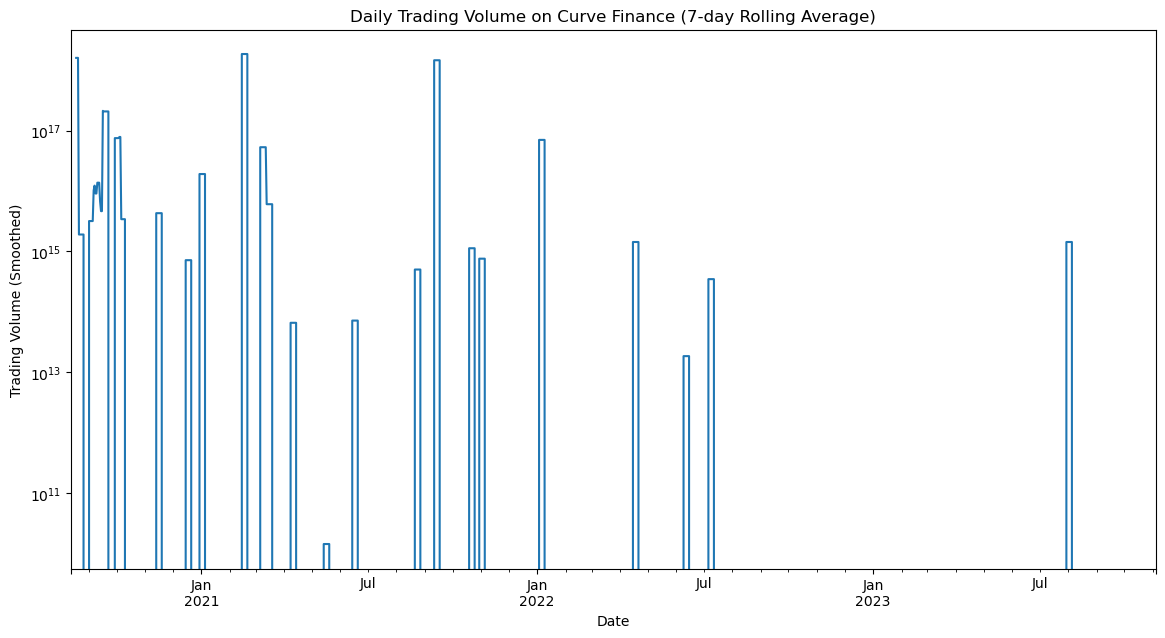

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Continue from the previous assumption that 'curve_trx_from_to_cleaned' and 'daily_trading_volume' are already defined.

# Apply a rolling window to smooth the data with a 7-day window
rolling_trading_volume = daily_trading_volume.rolling(window=7).mean()

# Plot the daily trading volume to visualize the historical trend with a rolling average
plt.figure(figsize=(14, 7))
rolling_trading_volume.plot(title='Daily Trading Volume on Curve Finance (7-day Rolling Average)')
plt.ylabel('Trading Volume (Smoothed)')
plt.xlabel('Date')
plt.yscale('log')  # Apply a logarithmic scale to the y-axis
plt.show()


In [21]:
# To identify the three most significant changes, you could use a variety of methods.
# One simple approach could be to find the days with the largest differences in trading volume
# compared to the previous day (i.e., the largest deltas).
significant_changes = daily_trading_volume.diff().nlargest(3)

# Output the dates with the most significant changes
print("Dates and amounts with the most significant changes in trading volume:")
print(significant_changes)


Dates and amounts with the most significant changes in trading volume:
timeStamp
2021-02-14    1.293500e+19
2020-08-14    1.116318e+19
2021-09-11    1.020000e+19
Name: value, dtype: float64


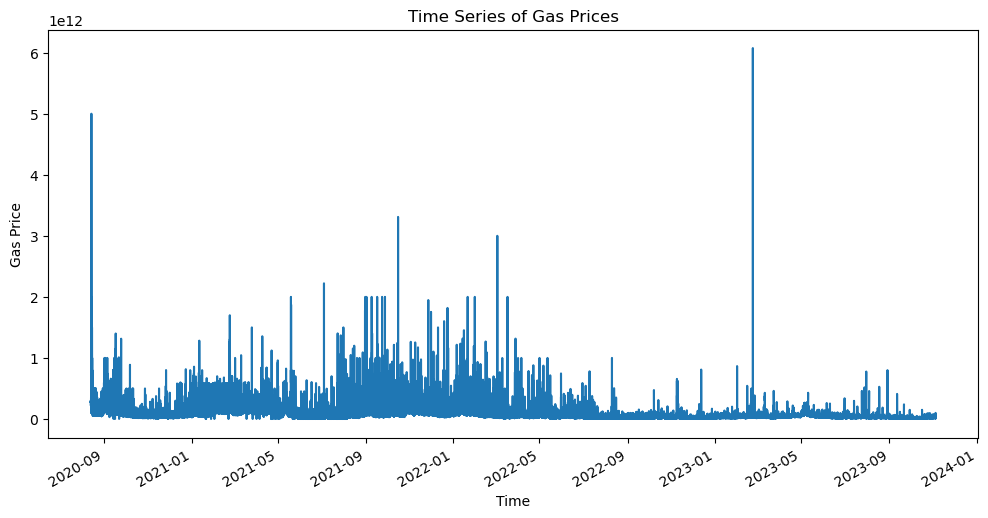

In [23]:
plt.figure(figsize=(12, 6))
curve_trx_from_to_cleaned['gasPrice'].plot()
plt.title('Time Series of Gas Prices')
plt.xlabel('Time')
plt.ylabel('Gas Price')
plt.show()


In [24]:
# Calculate the day-to-day absolute differences in gas prices
gas_price_changes = curve_trx_from_to_cleaned['gasPrice'].diff().abs()

# Identify the dates with the three largest changes
significant_gas_price_changes = gas_price_changes.nlargest(3)

# Display the dates and the amounts of the most significant changes
print("Dates with the most significant gas price changes:")
print(significant_gas_price_changes)

Dates with the most significant gas price changes:
timeStamp
2023-02-22 15:29:59    5.995079e+12
2023-02-22 15:29:23    5.985207e+12
2020-08-14 07:09:20    4.620000e+12
Name: gasPrice, dtype: float64
